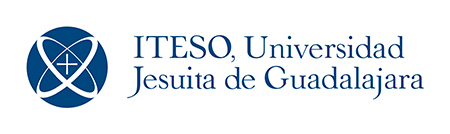
# <div style="text-align:center"><span style="color:black; font-family:Palatino; font-size:1.5em;"> Proyecto de Simulación de Procesos Financieros </span></div>


##  <div style="text-align:center"><span style="color:#800000; font-family:Palatino; font-size:1.5em;">Seguros de Gastos Médicos Mayores </span></div>



# Github en el cual realizamos el trabajo
https://github.com/CarlosRumo/Proyecto_SPF_Seguros_GMM.git

## Integrantes
- Carlos Ruiz
- Ricardo Rodriguez


## <div><span style=" font-size:1.5em;"> Objetivo del proyecto </span></div>

El objetivo del proyecto será comprender de una mejor manera el precio de los seguros de gastos médicos mayores, los cuales año con año van aumentando debido a dos razones: 1) inflación médica y 2) edad. Se estima que cada año que crecemos nuestro seguro se incrementa alrededor del 3.4%, sin embargo, por cuestiones de la pandemia y por un aumento en la demanda de estos productos financieros, se espera que este año se supere este promedio histórico que hasta ahora se había mantenido más o menos constante.

La inflación médica es el incremento en los costos de los servicios de salud, incluyendo medicinas, honorarios médicos, hospitales y procedimientos. En México, se estima que la inflación médica es tres veces mayor que la inflación general. Se estima que la inflación médica de 2019 fue de 14.2%.

Las variables que tomaremos a considereción para calcular los costos del Sgmm serán:
- edad
- sexo
- nivel de deducible
- suma asegurada

Para explicar mejor que variables afectan al costo de un seguro de gastos médicos, usaremos los nodos 1 y 2 para mostrar el monto de participación y el monto total de gasto de una aseguradora en una enfermedad que es muy común en la actualidad: el covid-19. 


## <div><span style=" font-size:1.5em;">  Nodos y Variables a Simular</span></div>

1. Calcular la participación de la aseguradora usando las variables del usuario (edad, género y nivel de deducible).
2. Usando el monto de participación de la empresa calculado anteriormente, obtendremos el monto de egresos de la empresa por cuestiones de pago de siniestros.
3. Se harán simulaciones para ver en rango de edad es más probable que sufras una enfermedad o accidente.
4. Usando la inflación médica, estimaremos el aumento de la prima del seguro en los siguientes 3 años.


## <div><span style=" font-size:1.5em;"> Hipótesis y supuestos </span></div>

Para determinar el precio de una prima de seguro, se necesitan de calculos actuariales que tratar de hacerlos haría este proyecto bastante extenso, por lo que usaremos las siguientes hipótesis y supuestos para facilitar los cálculos en este proyecto:

1. Se definirá un coaseguro del 10% fijo para todos los seguros.
2. Se utilizará la prima neta del seguro, por lo que excluiremos los derechos de la póliza y el IVA.
3. El deducible se dividira en tres categorías: bajo, medio y alto.
4. La edad se dividira en rangos cualitativos, segmentando a los asegurados como niño, joven y adulto.
5. La suma asegurada se dividira en rangos cualitativos, definiendo a las anteriores como baja, media o alta.
6. Se sustraerán datos de la inegi y de la AMIS para ver los rangos de edades en los cuales son más comunes los siniestros.
7. La inflación médica que se utilizará será la del 2019 (14.2%).





## <div><span style="color:#800000; font-family:Palatino; font-size:1em;"> Diagrama de Flujo </span></div>
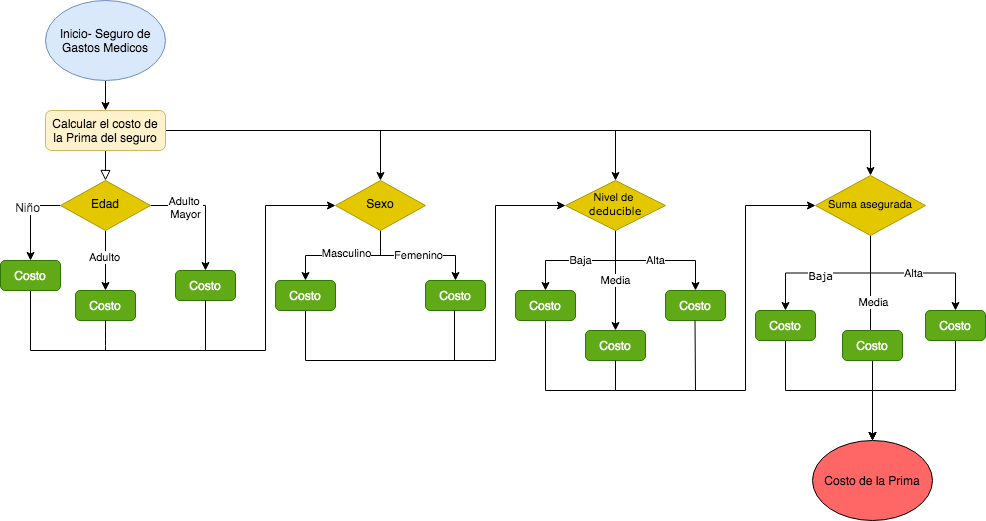
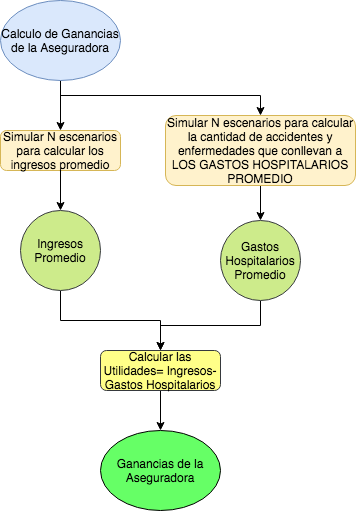

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting as cor
import scipy.stats as st
import scipy.special as sps
import os

### <div><span style="color:#800000; font-family:Palatino; font-size:1.5em;"> Primer Nodo </span></div>

In [5]:
#Importar base de datos
Base_Datos= 'Data_Base_GMM.csv'
primas_gmm = pd.read_csv(Base_Datos)
primas_gmm

,Sexo,Edad,Deducible,Prima total
0,Masculino,Joven,Bajo,9448.77
1,Masculino,Joven,Bajo,10100.00
2,Masculino,Joven,Bajo,10818.50
3,Masculino,Joven,Bajo,15617.64
4,Masculino,Joven,Bajo,17635.25
...,...,...,...,...
810,Femenino,Adulto,Alto,15619.00
811,Femenino,Adulto,Alto,18772.00
812,Femenino,Adulto,Alto,15565.00
813,Femenino,Adulto,Alto,16187.00


In [6]:
#variables
sexo = primas_gmm['Sexo']
edad = primas_gmm['Edad']
deducible = primas_gmm['Deducible']
costo = primas_gmm['Prima total']


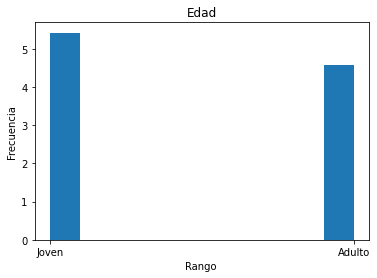

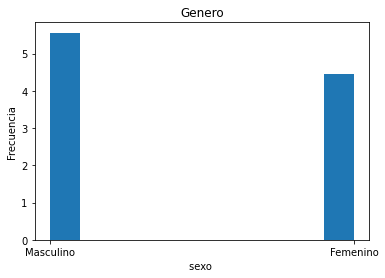

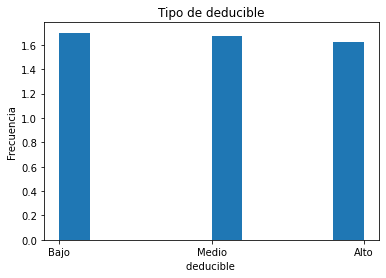

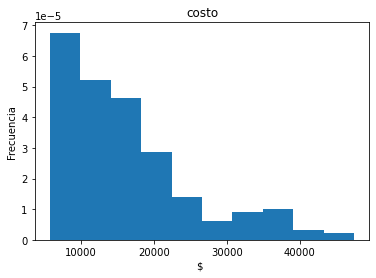

In [10]:
#Histogramas
plt.hist(edad, density=True)
plt.xlabel('Rango ')
plt.ylabel('Frecuencia')
plt.title('Edad')
plt.show()

plt.hist(sexo, density=True)
plt.xlabel('sexo ')
plt.ylabel('Frecuencia')
plt.title('Genero')
plt.show()

plt.hist(deducible, density=True)
plt.xlabel('deducible ')
plt.ylabel('Frecuencia')
plt.title('Tipo de deducible')
plt.show() 

plt.hist(costo, density=True)
plt.xlabel('$ ')
plt.ylabel('Frecuencia')
plt.title('costo')
plt.show() 


In [52]:
#Cálculo de la participación de la aseguradora en un siniestro

def prima(E,G,D,V):
    if E == 1: #siendo 1) Joven y 2) adulto
        p=0.04
    else:  
        p=0.09
    if G==1: # Siendo 1) masculino y 2) femenino
        p=p+0.05
    else:
        p = p+0.03
    if D==1: # siendo 1) deducible bajo, 2) deducible medio y 3) deducible alto
        p= p + 0.38
    else:
        if D==2:
            p = p + 0.28
        else:
            p = p + 0.18
            
    return(p*V)

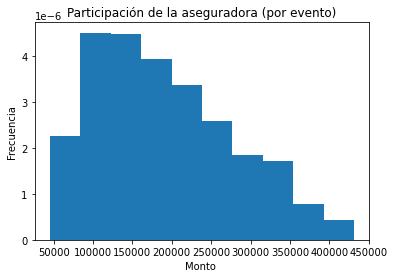

In [63]:
N=1000
E=np.random.randint(1,3,size=N)
G=np.random.randint(1,3,size=N)
D=np.random.randint(1,4,size=N)
V=np.random.randint(172000,847000,size=N)
costo =list(map(lambda x: prima(E[x],G[x],D[x], V[x]), np.arange(N)))
plt.hist(costo,density=True)
plt.title('Participación de la aseguradora (por evento)')
plt.xlabel('Monto ')
plt.ylabel('Frecuencia')
plt.show()


Para calcular el monto de participación por evento usamos un rango de gastos promedio por hospitalización a causa de Covi-19. los datos fueron obtenidos de https://www.eleconomista.com.mx/politica/Cuanto-cuesta-una-hospitalizacion-por-Covid-19-en-Mexico-20200805-0046.html.

### <div><span style="color:#800000; font-family:Palatino; font-size:1.5em;"> Segundo Nodo </span></div>

Para crear nuestra función de gasto de la aseguradora usaremos las estadísticas obtenidas del gasto promedio por una hospitalización causada por Covid-19. Los números aleatorios oscilarán entre el rango mínimo y máximo del promedio de gastos por covid-19. El gasto se expresará en pesos mexicanos y será de forma anual.

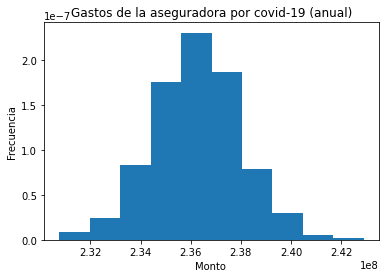

In [64]:
#Generar N primas aleatorias para crear nuestra función de egreso de la aseguradora
def egreso(x):
    N=1000
    E=np.random.randint(1,3,size=N)
    G=np.random.randint(1,3,size=N)
    D=np.random.randint(1,4,size=N)
    C_19=np.random.randint(172000,847000,size=N)
    A =list(map(lambda i: prima(E[i],G[i],D[i],V[i]), np.arange(N)))
    Egreso = sum(A)
    return Egreso

#Simulación de los egresos
Gasto = list(map(lambda i: egreso(i), np.arange(N)))
plt.hist(B,density=True)
plt.title('Gastos de la aseguradora por covid-19 (anual)')
plt.xlabel('Monto ')
plt.ylabel('Frecuencia')
plt.show()

In [73]:
promedio = np.mean(Gasto)
print('El promedio de gasto de la aseguradora por atender a 1000 asegurados con la enfermedad Covid-19 es de $',promedio,' al año.')
desv = np.std(Gasto)
print('La desviación estandar del gasto anual para la aseguradora es de $',desv,'al año.')

El promedio de gasto de la aseguradora por atender a 1000 asegurados con la enfermedad Covid-19 es de $ 190118297.74288997  al año.
La desviación estandar del gasto anual para la aseguradora es de $ 1441173.0945842098 al año.


In [77]:
#Realizar prueba de hipótesis para determinar si la distribución de gastos se comporta de manera normal

media = Gasto; sd = desv; N = 1000
confianza = 0.95
significancia = 1 - confianza
X = np.random.normal(media,sd,N)
st.sem

<function scipy.stats.stats.sem(a, axis=0, ddof=1, nan_policy='propagate')>